# **Importando bibliotecas**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura dos dados

In [2]:
df_train = pd.read_csv('desafio_manutencao_preditiva_treino.csv')
df_test = pd.read_csv('desafio_manutencao_preditiva_teste.csv')

In [3]:
df_train.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure


**As colunas de 'udi' e 'product_id' não apresentam influencia nas análises, por isso serão removidas.**

In [4]:
df_train = df_train.drop(['udi', 'product_id'], axis=1)
df_train

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.2,308.7,1408,40.0,9,No Failure
3,M,298.1,308.6,1425,41.9,11,No Failure
4,L,298.1,308.6,1558,42.4,14,No Failure
...,...,...,...,...,...,...,...
6662,L,298.8,308.3,1634,27.9,12,No Failure
6663,M,298.8,308.4,1604,29.5,14,No Failure
6664,H,298.9,308.4,1632,31.8,17,No Failure
6665,H,299.0,308.7,1408,48.5,25,No Failure


In [5]:
df_train.shape

(6667, 7)

# As funções .describe() e .info() mostram as principais estatísticas descritivas dos dados, assim como que não existem valores faltantes para serem tratados antes da construção dos modelos de Machine Learning

In [6]:
df_train.describe()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,299.992515,309.992620,1537.419529,40.058512,108.098095
std,1.994710,1.488101,177.182908,9.950804,63.359915
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1422.500000,33.200000,54.000000
50%,300.000000,310.000000,1503.000000,40.200000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,251.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type                   6667 non-null   object 
 1   air_temperature_k      6667 non-null   float64
 2   process_temperature_k  6667 non-null   float64
 3   rotational_speed_rpm   6667 non-null   int64  
 4   torque_nm              6667 non-null   float64
 5   tool_wear_min          6667 non-null   int64  
 6   failure_type           6667 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 364.7+ KB


# Pode-se observar que a variável alvo (target) está desbalanceada, pois há muitos valores para categoria 'No Failure'. Um possível estudo posterior poderia mostrar se técnicas de superamostragem das classes minoritárias (SMOTE: Synthetic Minority Over-sampling Technique) seria interessante para evitar Overfitting

In [8]:
count = pd.DataFrame(df_train['failure_type'].value_counts())
count

,failure_type
No Failure,6435
Heat Dissipation Failure,75
Power Failure,63
Overstrain Failure,52
Tool Wear Failure,30
Random Failures,12


O histograma nos mostra a distribuição dos atributos que serão utilizados na previsão

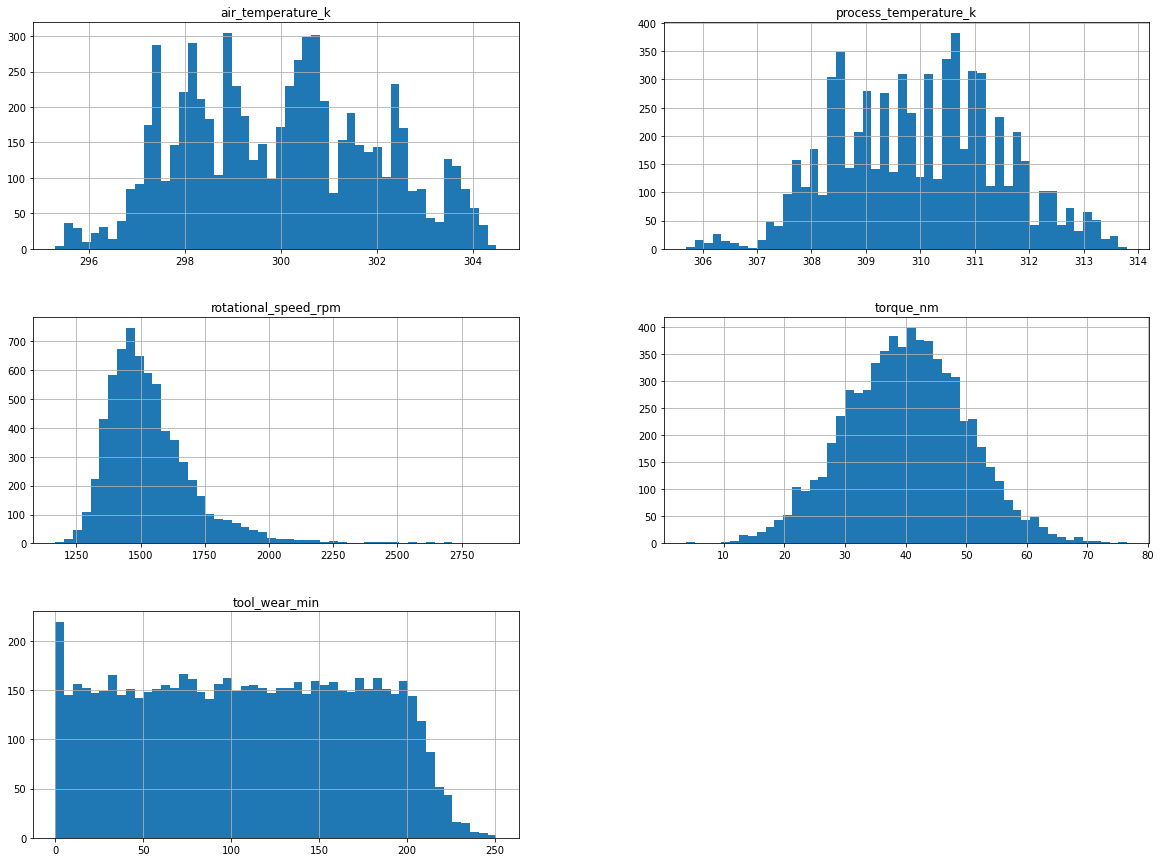

In [9]:
df_train.hist(bins=50, figsize=(20,15))
plt.show()

# A partir da matriz de correlação, observa-se que a temperatura do ar (air_temperature_k) e a temperatura do processo (process_temperature_k) possuem alta correlação positiva. Enquanto que a velocidade de rotação (rotational_speed_rpm) e o torque (torque_nm) possuem alta correlação negativa. Essas observações também podem ser observadas no gráfico de disperssão.

In [10]:
df_train_corr = df_train.corr()
df_train_corr

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
air_temperature_k,1.000000,0.875724,0.035903,-0.023257,0.021078
process_temperature_k,0.875724,1.000000,0.033379,-0.024457,0.020298
rotational_speed_rpm,0.035903,0.033379,1.000000,-0.875989,-0.001290
torque_nm,-0.023257,-0.024457,-0.875989,1.000000,-0.004343
tool_wear_min,0.021078,0.020298,-0.001290,-0.004343,1.000000


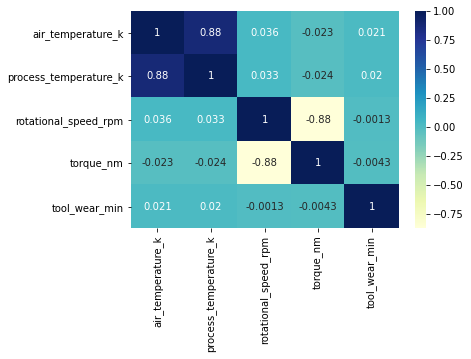

In [11]:
sns.heatmap(df_train_corr, annot=True, cmap="YlGnBu")

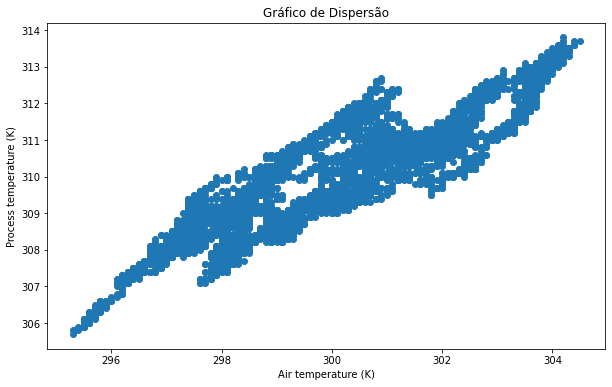

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(df_train['air_temperature_k'], df_train['process_temperature_k'])
plt.title('Gráfico de Dispersão')
plt.xlabel('Air temperature (K)')
plt.ylabel('Process temperature (K)')
plt.show()

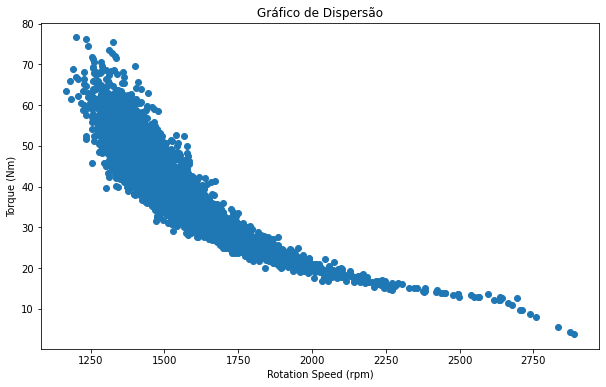

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df_train['rotational_speed_rpm'], df_train['torque_nm'])
plt.title('Gráfico de Dispersão')
plt.xlabel('Rotation Speed (rpm)')
plt.ylabel('Torque (Nm)')
plt.show()

A visualização da distribuição do tipo do produto foi criada em um gráfico de barras abaixo.

Text(0.5, 1.0, 'Gráfico de barras')

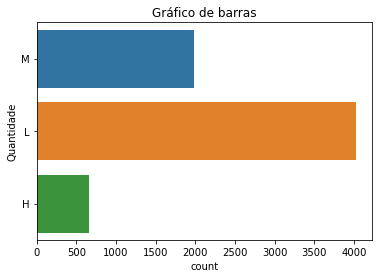

In [14]:
failure_type = sns.countplot(y='type', orient='H', data=df_train)
failure_type.set_ylabel("Quantidade")
failure_type.set_title("Gráfico de barras")

# Gráficos de boxplot foram criados, e apenas nas variáveis de velocidade de rotação (rotational_speed_rpm) e torque (torque_nm) foram observados pontos de outliers. Estudos posteriores poderiam ser desenvolvidos para avaliar se esses pontos extremos possuem influencia positiva ou negativa na criação dos modelos de Machine Learning para previsão da variável alvo. 

Text(0, 0.5, 'Rotation Speed (rpm)')

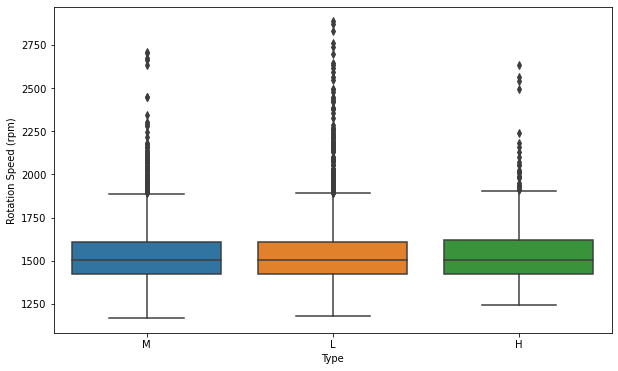

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'type', y = 'rotational_speed_rpm', data = df_train)
plt.xlabel('Type')
plt.ylabel('Rotation Speed (rpm)')

Text(0, 0.5, 'Rotation Speed (rpm)')

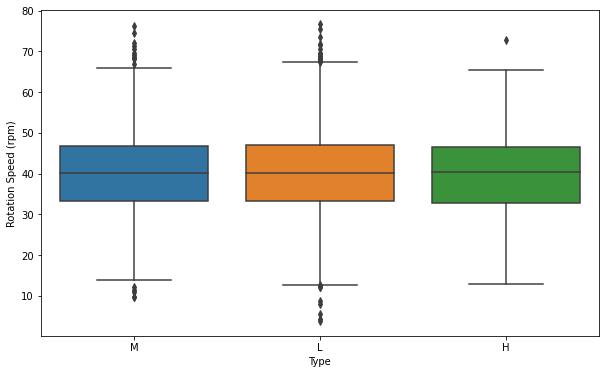

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'type', y = 'torque_nm', data = df_train)
#sns.stripplot(x = 'type', y = 'rotational_speed_rpm', data = df_train)
plt.xlabel('Type')
plt.ylabel('Rotation Speed (rpm)')

# Pelo fato de se tratar de um problema onde a variável alvo (target) possuem 5 categorias possíveis (No Failure, Heat Dissipation Failure, Power Failure, Overstrain Failure, Tool Wear Failure e Random Failures) a abordagem é de classificação. 